## Inferenz für die Standardabweichung einer Grundgesamtheit
----------------------------------------

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
import scipy.stats
import statsmodels.api as smi


%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Inferenz für eine Grundgesamtheitsstandardabweichung basiert auf der <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">Chi-Quadrat ($\chi^2$)-Verteilung</a>. Eine $\chi^2$-Verteilung ist eine rechtsschiefe Wahrscheinlichkeitsdichtekurve. Die Form der $\chi^2$-Kurve wird durch ihre Freiheitsgrade ($df$) bestimmt.

![Alt-Text](77_inferenzchi.png)

Um einen Hypothesentest für eine Populationsstandardabweichung durchzuführen, wird ein $\chi^2$-Wert mit einer bestimmten Fläche unter einer $\chi^2$-Kurve in Beziehung gesetzt. Entweder wir ziehen eine $\chi^2$-Tabelle, um diesen Wert nachzuschlagen, oder wir machen von der Python-Maschinerie Gebrauch.

Bei gegebenen $\alpha$, wobei $\alpha$ einer Wahrscheinlichkeit zwischen $0$ und $1$ entspricht, bezeichnet $\chi^2_\alpha$ den $\chi^2$ -Wert, der die Fläche $\alpha$ zu seiner Rechten unter einer $\chi^2$ -Kurve hat.

![Alt-Text](77_inferenzchi2.png)

### Intervall-Schätzung von $\sigma$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\sigma$ beträgt

$$\sqrt{\frac{n-1}{\chi^2_{\alpha/2}}} \le \sigma \le \sqrt{\frac{n-1}{\chi^2_{1-\alpha/2}} }$$

wobei $n$ der Stichprobenumfang und $s$ die Standardabweichung der Stichprobendaten ist.

### $\chi^2$-Test für eine Standardabweichung

Das Hypothesentestverfahren für eine Standardabweichung wird als **$\chi^2$-Test für eine Standardabweichung** bezeichnet. Hypothesentests für Varianzen folgen demselben schrittweisen Verfahren wie Hypothesentests für den Mittelwert. 

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

Die Teststatistik für einen Hypothesentest mit der Nullhypothese $H_0: \,\sigma = \sigma_0$ für eine normalverteilte Variable ist gegeben durch

$$\chi^2 = \frac{n-1}{\sigma^2_0}s^2$$

Die Variable folgt einer $\chi^2$-Verteilung mit $n-1$ Freiheitsgraden.

Beachten Sie, dass der Test auf eine Standardabweichung $\chi^2$-Test nicht robust gegenüber Abweichungen von der Normalverteilung ist (Weiss 2010).

### $\chi^2$ -Test für eine Standardabweichung : Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den $\chi^2$-Test mit einer Standardabweichung in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [11]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.*

Um den **$\chi^2$-Test mit einer Standardabweichung** zu zeigen, untersuchen wir die Streuung der Körpergröße in cm der Studentinnen und vergleichen sie mit der Streuung der Körpergröße aller Studenten (unserer Grundgesamtheit). **Wir wollen testen, ob die Standardabweichung der Körpergröße der Studentinnen kleiner ist als die Standardabweichung der Körpergröße aller Studenten.**

### Vorbereitung der Daten

Wir beginnen mit der Datenaufbereitung.

- Zunächst definieren wir die Standardabweichung der Grundgesamtheit. In unserem Beispiel entspricht die Grundgesamtheit der Körpergröße aller $8239$ Studenten im Datensatz. Wir berechnen die Standardabweichung für die Variable `height` und weisen ihr den Variablennamen `sigma0` zu.
- Zweitens unterteilen wir den Datensatz anhand der Variable `gender`.
- Drittens nehmen wir eine Stichprobe von $30$ Studentinnen und extrahieren die interessierende Statistik, die Standardabweichung der Größe der Studentinnen in unserer Stichprobe.

In [12]:
sigma0 = np.std(students['height'])
sigma0

11.07685685261271

Die Standardabweichung der interessierenden Grundgesamtheit ($\sigma_0$) beträgt $\approx$ $11,08$ cm.

In [13]:
female = students.loc[students['gender']=='Female']

n = 30
female_sample = female['height'].sample(n=30, random_state=1)
sample_std = np.std(female_sample)

Außerdem überprüfen wir die Normalverteilungsannahme, indem wir ein <a href="https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot">Q-Q-Diagramm</a> erstellen. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0, 0.5, 'Stichproben Quantillen')

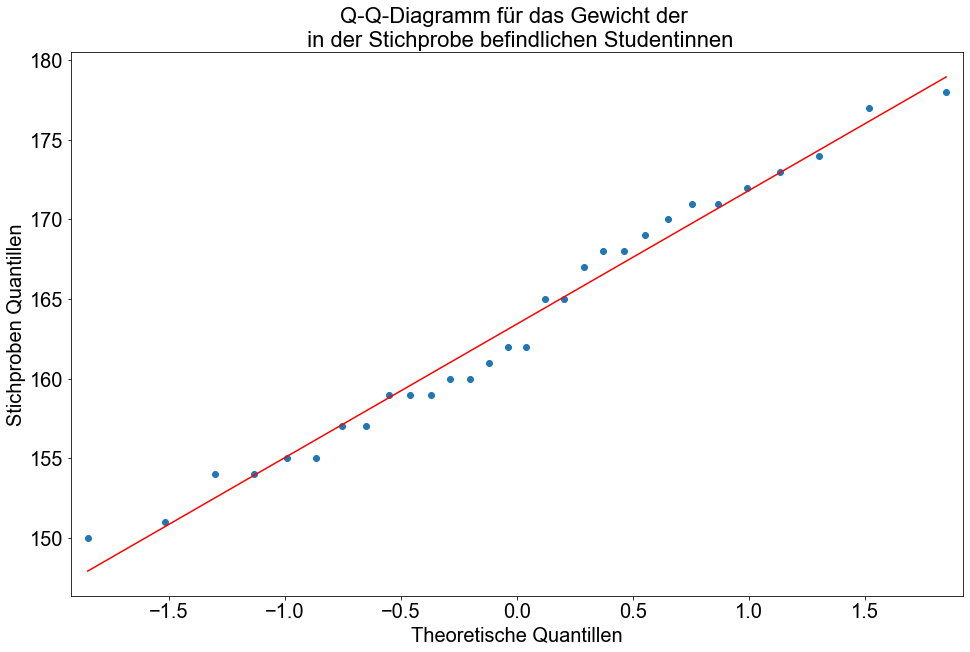

In [14]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(female_sample, line = "r")
ax1=qqp.gca()
ax1.set_title('Q-Q-Diagramm für das Gewicht der \n in der Stichprobe befindlichen Studentinnen')
ax1.set_xlabel('Theoretische Quantillen')
ax1.set_ylabel('Stichproben Quantillen')

Wir sehen, dass die Daten ungefähr auf einer Geraden liegen. Auf der Grundlage des grafischen Auswertungsansatzes kommen wir zu dem Schluss, dass die interessierende Variable ungefähr normalverteilt ist.

### Überprüfung der Hypothesen

Zur Durchführung des **$\chi^2$-Tests mit einer Standardabweichung** folgen wir dem Verfahren der schrittweisen Durchführung von Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass die Standardabweichung der Körpergröße der Studentinnen ($\sigma$) gleich der Standardabweichung der Grundgesamtheit ($\sigma_0 \approx 11,08$ cm) ist.

$$H_0: \quad \sigma = \sigma_0$$

**Alternative Hypothese**

$$H_A: \quad \sigma < \sigma_0$$

Diese Formulierung führt zu einem linksseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,05$$

In [15]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben:

$$\chi^2 = \frac{n-1}{\sigma^2_0}s^2$$

In [16]:
# Berechne Teststatistik
n = len(female_sample)
s_2 = np.var(female_sample)
sigma0_2 = np.var(students['height'])
x2 = ((n-1)/sigma0_2)*s_2
x2

13.798146006906832

Der numerische Wert der Teststatistik ist $13,798146$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `chi2.ppf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet:

$$df=n-1$$

In [17]:
# Berechne df
df = n-1

# Berechne p-Wert
p = scipy.stats.chi2.cdf(x2,df = df)
p

0.007647835458960158

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [18]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $5 \%$-Niveau und liefern starke Beweise gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,0076478$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass die Standardabweichung der Körpergröße von Studentinnen weniger als $11$ cm beträgt.

### Hypothesentests in Python

Wir haben gerade einen $\chi^2$-Test mit einer Standardabweichung in Python manuell durchgeführt. Meines Wissens bietet Python keine eingebaute Funktion zur Berechnung einer Standardabweichung $\chi^2$-Test. Wir können jedoch eine solche Funktion selbst implementieren. Unsere Funktion `simple_x2_test()` nimmt als Eingabe einen Stichprobenvektor `x`, die Standardabweichung der Grundgesamtheit `sigma0`, das Signifikanzniveau `alpha` und die angegebene Methode, `right`, `left` und `two-sided`.

In [19]:
def simple_x2_test(x, sigma0, alpha, method = 'two-sided'):
    df = len(x)-1
    v = np.var(x)
    # Berechne Teststatistik
    testchi = df/(sigma0**2)*v
    
    # linksseitiger Test
    if (method=='left'):
        p = scipy.stats.chi2.cdf(x = testchi, df = df)
    # rechtsseitiger Test   
    elif method=='right':
        p = 1-scipy.stats.chi2.cdf(x = testchi, df = df)
         
          
    # beidseitiger Test (default)
    else:
        p_upper = 1-scipy.stats.chi2.cdf(x = testchi, df = df)
        p_lower = scipy.stats.chi2.cdf(x = testchi, df = df)
        if (p_upper*2 > 1):
            p = p_lower*2
        else:
            p = p_upper*2
    #evaluiere p < alpha
    if p < alpha:
          reject = True
    else:
          reject = False

            
    # Ausgabe
    print('Significance level:',alpha)
    print('Degrees of freedom:',df)
    print('Test statistic:',round(testchi,4))
    print('p-value:',p)
    print('Reject H0:',reject)

Wenden wir nun unsere selbst erstellte Funktion `simple_x2_test()` auf die obigen Beispieldaten an.

In [20]:
sigma0 = np.std(students['height'])
simple_x2_test(x = female_sample, sigma0 = sigma0, alpha = 0.05, method = 'left')

Significance level: 0.05
Degrees of freedom: 29
Test statistic: 13.7981
p-value: 0.007647835458960185
Reject H0: True


Perfekt! Vergleichen Sie die Ausgabe der Funktion `simple_x2_test()` mit unserem Ergebnis von oben. Auch hier können wir zu dem Schluss kommen, dass die Daten bei einem Signifikanzniveau von $5 \%$ starke Anhaltspunkte dafür liefern, dass die Standardabweichung der Körpergröße von Studentinnen weniger als $11$ cm beträgt.